In [248]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [249]:
url = 'https://raw.githubusercontent.com/panicpotatoe/dataset/master/automobile.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [251]:

df_part2 = df[['length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio','horsepower','price']]
df_part2

,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,price
0,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,13495
1,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,16500
2,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,16500
3,176.6,66.2,54.3,2337,four,109,3.19,3.4,10.0,102,13950
4,176.6,66.4,54.3,2824,five,136,3.19,3.4,8.0,115,17450
...,...,...,...,...,...,...,...,...,...,...,...
197,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160,19045
198,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134,21485
199,188.8,68.9,55.5,3217,six,145,3.01,3.4,23.0,106,22470
200,188.8,68.9,55.5,3062,four,141,3.78,3.15,9.5,114,22625


In [252]:
df_part2.groupby('num-of-cylinders')['num-of-cylinders'].count()

num-of-cylinders
eight       4
five       10
four      158
six        24
three       1
twelve      1
two         4
Name: num-of-cylinders, dtype: int64

In [253]:
cylinder_map = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

df_part2['num-of-cylinders'] = df_part2['num-of-cylinders'].map(cylinder_map)


C:\Users\tran_\AppData\Local\Temp\ipykernel_19600\4237906550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part2['num-of-cylinders'] = df_part2['num-of-cylinders'].map(cylinder_map)


In [254]:
df_part2

,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,price
0,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,13495
1,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,16500
2,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,16500
3,176.6,66.2,54.3,2337,4,109,3.19,3.4,10.0,102,13950
4,176.6,66.4,54.3,2824,5,136,3.19,3.4,8.0,115,17450
...,...,...,...,...,...,...,...,...,...,...,...
197,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,19045
198,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,21485
199,188.8,68.9,55.5,3217,6,145,3.01,3.4,23.0,106,22470
200,188.8,68.9,55.5,3062,4,141,3.78,3.15,9.5,114,22625


In [255]:
df_part2 = df_part2.apply(pd.to_numeric, errors='coerce')
df_part2.fillna(0, inplace=True)
df_part2

,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,price
0,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,13495
1,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,16500
2,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,16500
3,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,13950
4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,17450
...,...,...,...,...,...,...,...,...,...,...,...
197,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160.0,19045
198,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134.0,21485
199,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106.0,22470
200,188.8,68.9,55.5,3062,4,141,3.78,3.15,9.5,114.0,22625


In [256]:
df_train = df_part2[:181]
df_test = df_part2[181:]

In [257]:
X_train = df_train[['engine-size','horsepower']]
np_X_train = np.array(X_train)
y_train = df_train[['price']]
model = LinearRegression()
reg = model.fit(np_X_train, y_train)

_score = reg.score(np_X_train, y_train)
print('Điểm của mô hình là:', _score)

reg.coef_

Điểm của mô hình là: 0.7962541233470781


array([[125.8165943 ,  55.70357087]])

In [258]:
X_test = df_test[['engine-size','horsepower']]
y_test = df_test[['price']]
np_X_test = np.array(X_test)
y_predict = reg.predict(np_X_test)
y_predict

array([[ 9867.76403825],
       [ 9867.76403825],
       [ 7411.00420179],
       [10703.31760136],
       [10146.28189262],
       [10146.28189262],
       [14657.40135622],
       [ 7411.00420179],
       [10034.87475087],
       [15509.29861122],
       [15509.29861122],
       [15509.29861122],
       [15509.29861122],
       [16799.08747586],
       [16799.08747586],
       [15509.29861122],
       [18071.66287142],
       [20649.50104632],
       [15566.93642143],
       [15509.29861122],
       [15509.29861122]])

In [259]:
diff = abs(y_predict - y_test)
diff

,price
181,1672.764038
182,1372.764038
183,2083.995798
184,708.317601
185,1448.718107
186,166.281893
187,1362.401356
188,6433.995798
189,2255.125249
190,2569.298611


In [260]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))
# giá trị càng nhỏ mô hình càng tốt

Mean squared error: 11038998.50


In [261]:
# Coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))
#nằm trên đoạn 0 - 1, càng gần 1 mô hình càng tốt

Coefficient of determination: 0.50


Text(0.5, 0, 'price')

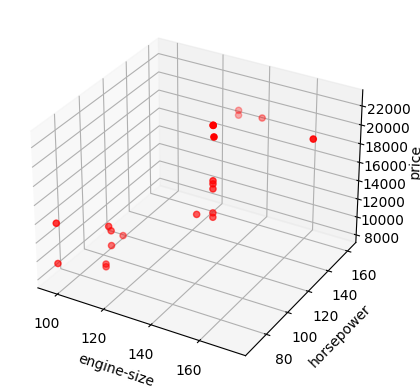

In [262]:
# plt.scatter(X_test, y_test, color="Blue")
fig =plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test['engine-size'],X_test['horsepower'], y_test['price'], color="red")


ax.set_xlabel('engine-size')
ax.set_ylabel('horsepower')
ax.set_zlabel('price')

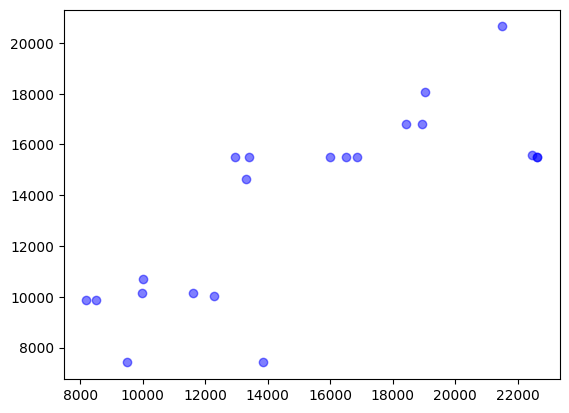

In [279]:
plt.scatter(y_test, y_predict, color="Blue", alpha=0.5, label='Predicted', linewidths=True)
# plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
# plt.xticks(())
# plt.yticks(())
plt.show()